In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

### Loading and preparing the data 

In [6]:
# read csv  
df = pd.read_csv("final_crypto_data_unscaled.csv", index_col=0)
df.head()

,Date,Price,Volume,Market_cap,crypto_name,name_price_attention,return,crypto_dummy,log_attention,log_return
0,2019-06-21,1.604939,6.653181e+05,0.000000e+00,Algorand,1.50,0.000,0,0.405465,0.000000
1,2019-06-22,3.172364,1.790331e+08,1.010855e+08,Algorand,0.00,97.663,0,0.000000,4.581523
2,2019-06-23,2.159165,2.588226e+08,7.665618e+07,Algorand,1.38,-31.938,0,0.322083,0.000000
3,2019-06-24,1.899598,2.100211e+08,6.647512e+07,Algorand,0.00,-12.022,0,0.000000,0.000000
4,2019-06-25,1.409310,1.574706e+08,5.522254e+07,Algorand,0.00,-25.810,0,0.000000,0.000000


In [259]:
df.describe()

/Users/alex/anaconda3/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/alex/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/alex/anaconda3/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Price,Volume,Market_cap,name_price_attention,return,crypto_dummy,log_attention,log_return
count,50427.000000,5.042700e+04,5.042700e+04,50427.000000,50427.000000,50427.000000,5.042700e+04,2.538400e+04
mean,1022.535010,1.701812e+09,2.474961e+10,5.386968,0.378412,12.225633,-inf,-inf
std,5564.872000,6.230277e+09,1.048135e+11,10.290581,8.672981,7.103828,NaN,NaN
min,0.000000,0.000000e+00,0.000000e+00,0.000000,-90.957000,0.000000,-inf,-inf
25%,0.110251,4.261000e+07,5.682119e+08,0.000000,-2.516000,6.000000,NaN,0.000000e+00
50%,2.144879,1.943117e+08,3.116606e+09,1.200000,0.000000,12.000000,1.823216e-01,9.166907e-01
75%,25.532743,7.773529e+08,8.775352e+09,5.940000,2.521500,18.000000,1.781709e+00,1.662220e+00
max,67617.015545,1.788941e+11,1.278798e+12,100.000000,573.435000,25.000000,4.605170e+00,6.351645e+00


In [7]:
df_scaled = pd.read_csv("final_crypto_data_scaled.csv", index_col=0)

In [8]:
df_scaled.describe()

,Price,Volume,Market_cap,name_price_attention,return,crypto_dummy,log_attention,log_return
count,50427.000000,50427.000000,50427.000000,50427.000000,50427.000000,50427.000000,50427.000000,50427.000000
mean,0.006753,0.006665,0.001447,0.018498,-0.001837,12.225633,0.876769,0.393754
std,1.018506,1.011442,1.003094,1.013322,0.994486,7.103828,1.224623,1.013377
min,-0.180395,-0.269613,-0.235414,-0.511961,-10.474799,0.000000,-3.912023,-6.907755
25%,-0.180375,-0.262695,-0.229976,-0.511961,-0.333724,6.000000,0.000000,0.000000
50%,-0.180003,-0.238067,-0.205587,-0.393796,-0.045227,12.000000,0.182322,0.000000
75%,-0.175722,-0.143415,-0.151431,0.072956,0.243900,18.000000,1.781709,0.924854
max,12.195147,28.772585,12.003043,9.335121,65.707619,25.000000,4.605170,6.351645


# OLS Regression Models

In [9]:
# OLS Regression with uncleaned data
from statsmodels.formula.api import ols

model_1 = ols('Q("return") ~  name_price_attention + C(crypto_dummy)', data=df).fit() 

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     7.205
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           2.60e-26
Time:                        19:36:38   Log-Likelihood:            -1.8039e+05
No. Observations:               50427   AIC:                         3.608e+05
Df Residuals:                   50400   BIC:                         3.611e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.3747      0.217     -1.728      0.084      -0.800       0.050
C(crypto_dummy)[T.1]      2.6342      0.592      4.451      0.000       1.474       3.794
C(crypto_dummy)[T.2]      0.2003      0.329      0.609      0.542      -0.444       0.845
C(crypto_dummy)[T.3]      0.6952      0.281      2.476      0.013       0.145       1.246
C(crypto_dummy)[T.4]      0.1741      0.256      0.679      0.497      -0.328       0.677
C(crypto_dummy)[T.5]      0.4826      0.280      1.726      0.084      -0.066       1.031
C(crypto_dummy)[T.6]      0.4678      0.281      1.667      0.096      -0.082       1.018
C(crypto_dummy)[T.7]      0.4151      0.281      1.479      0.139      -0.135       0.965
C(crypto_dummy)[T.8]      0.3461      0.296      1.168      0.243      -0.234       0.927
C(crypto_dummy)[T.9]      0.7314      0.261      2.803      0.005       0.220       1.243
C(crypto_dummy)[T.10]     0.6872      0.272      2.522      0.012       0.153       1.221
C(crypto_dummy)[T.11]     0.3031      0.331      0.914      0.361      -0.347       0.953
C(crypto_dummy)[T.12]     0.4163      0.306      1.358      0.174      -0.184       1.017
C(crypto_dummy)[T.13]     0.8006      0.332      2.412      0.016       0.150       1.451
C(crypto_dummy)[T.14]     0.4654      0.260      1.787      0.074      -0.045       0.976
C(crypto_dummy)[T.15]     0.5539      0.332      1.670      0.095      -0.096       1.204
C(crypto_dummy)[T.16]     0.0767      0.326      0.235      0.814      -0.562       0.716
C(crypto_dummy)[T.17]     0.7495      0.299      2.504      0.012       0.163       1.336
C(crypto_dummy)[T.18]     0.4283      0.257      1.668      0.095      -0.075       0.932
C(crypto_dummy)[T.19]     1.9321      0.326      5.922      0.000       1.293       2.572
C(crypto_dummy)[T.20]     0.5221      0.317      1.647      0.100      -0.099       1.143
C(crypto_dummy)[T.21]     0.3875      0.307      1.261      0.207      -0.215       0.990
C(crypto_dummy)[T.22]     0.7530      0.261      2.885      0.004       0.241       1.265
C(crypto_dummy)[T.23]     0.3584      0.418      0.857      0.391      -0.461       1.178
C(crypto_dummy)[T.24]     0.3023      0.328      0.920      0.357      -0.341       0.946
C(crypto_dummy)[T.25]     0.3204      0.289      1.109      0.268      -0.246       0.887
name_price_attention      0.0444      0.004     11.263      0.000       0.037       0.052
==============================================================================
Omnibus:                   107972.310   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1822675010.219
Skew:                          18.457   Prob(JB):                         0.00
Kurtosis:                     933.652   Cond. No.                  

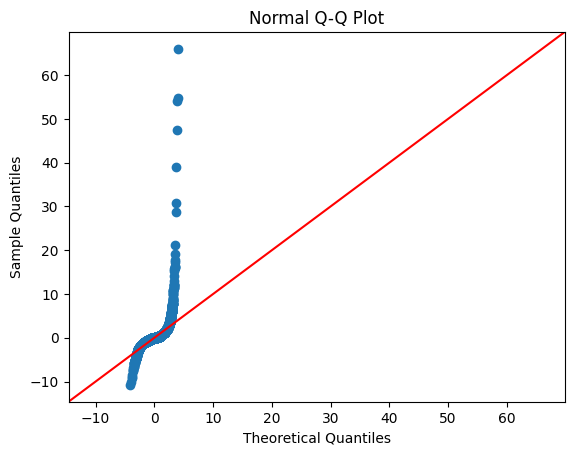

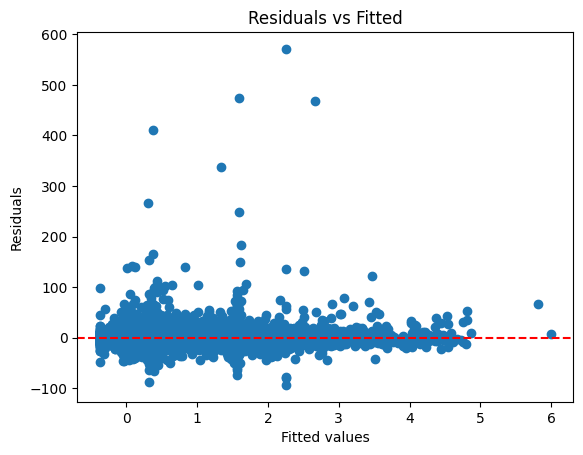

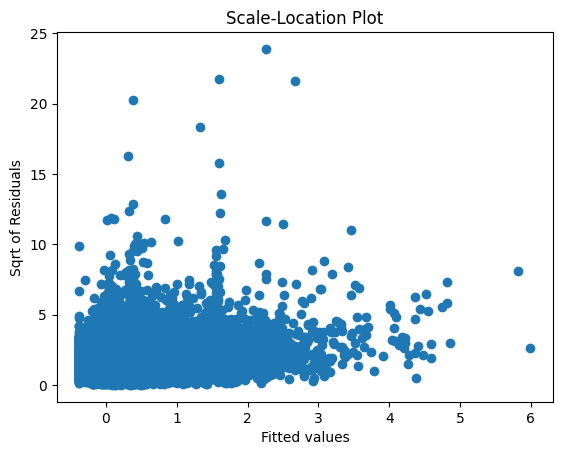

In [10]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_1.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_1.fittedvalues, model_1.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(model_1.fittedvalues, model_1.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
#sm.graphics.influence_plot(model_1, criterion="cooks")
#plt.title('Influence Plot')
#plt.show()

The diagnostic plots indicate a non-normal distribution of residual with fat tails, which is an indicator of outliers present in the data that may have an influence on the model.

The residuals vs fitted values shows a slight funnel shape, which may be an indicator of heterscedasticity. Additionally, there seem to be influential observations impacting model accuracy. The majority of the data is scattered around the 0 line indicating linearity. 

The Scale-Location also supports the notion of heteroscedasticity being present in the data. 

We now included all control variables to see whether model performance improved. 

In [11]:
model_2 = ols('Q("return") ~  name_price_attention + C(crypto_dummy) + Market_cap + Volume', data=df).fit() 

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     7.838
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           1.61e-31
Time:                        19:51:33   Log-Likelihood:            -1.8038e+05
No. Observations:               50427   AIC:                         3.608e+05
Df Residuals:                   50398   BIC:                         3.611e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.3624      0.217     -1.670      0.095      -0.788       0.063
C(crypto_dummy)[T.1]      2.6235      0.592      4.434      0.000       1.464       3.783
C(crypto_dummy)[T.2]      0.2061      0.329      0.627      0.531      -0.438       0.850
C(crypto_dummy)[T.3]      0.7206      0.281      2.562      0.010       0.169       1.272
C(crypto_dummy)[T.4]      0.1859      0.288      0.646      0.518      -0.378       0.749
C(crypto_dummy)[T.5]      0.3968      0.280      1.415      0.157      -0.153       0.946
C(crypto_dummy)[T.6]      0.4610      0.281      1.641      0.101      -0.089       1.011
C(crypto_dummy)[T.7]      0.3965      0.281      1.413      0.158      -0.154       0.947
C(crypto_dummy)[T.8]      0.3354      0.296      1.132      0.257      -0.245       0.916
C(crypto_dummy)[T.9]      0.7066      0.261      2.705      0.007       0.195       1.218
C(crypto_dummy)[T.10]     0.6381      0.273      2.339      0.019       0.103       1.173
C(crypto_dummy)[T.11]     0.2840      0.332      0.857      0.392      -0.366       0.934
C(crypto_dummy)[T.12]     0.4112      0.306      1.342      0.180      -0.189       1.012
C(crypto_dummy)[T.13]     0.7931      0.332      2.389      0.017       0.143       1.444
C(crypto_dummy)[T.14]     0.4004      0.261      1.535      0.125      -0.111       0.912
C(crypto_dummy)[T.15]     0.5439      0.332      1.640      0.101      -0.106       1.194
C(crypto_dummy)[T.16]     0.0871      0.326      0.267      0.789      -0.552       0.726
C(crypto_dummy)[T.17]     0.7335      0.299      2.450      0.014       0.147       1.320
C(crypto_dummy)[T.18]     0.3859      0.257      1.500      0.134      -0.118       0.890
C(crypto_dummy)[T.19]     1.9123      0.326      5.861      0.000       1.273       2.552
C(crypto_dummy)[T.20]     0.5185      0.317      1.636      0.102      -0.103       1.140
C(crypto_dummy)[T.21]     0.3871      0.307      1.260      0.208      -0.215       0.989
C(crypto_dummy)[T.22]     0.7404      0.261      2.836      0.005       0.229       1.252
C(crypto_dummy)[T.23]     0.3455      0.418      0.826      0.409      -0.474       1.165
C(crypto_dummy)[T.24]     0.3017      0.328      0.919      0.358      -0.342       0.945
C(crypto_dummy)[T.25]     0.3093      0.289      1.071      0.284      -0.257       0.876
name_price_attention      0.0429      0.004     10.494      0.000       0.035       0.051
Market_cap            -2.989e-12   6.05e-13     -4.943      0.000   -4.17e-12    -1.8e-12
Volume                 5.179e-11   9.93e-12      5.215      0.000    3.23e-11    7.13e-11
==============================================================================
Omnibus:                   107942.264   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarqu

The low R-squared values in combination with the high AIC and BIC values suggest that the models have very low to no predictive power.

**Test statistics**

Omnibus Test: The Omnibus test is a statistical test to check the skewness and kurtosis of the residuals. A significant result (Prob(Omnibus) close to 0, as in this case) indicates that the residuals are not normally distributed. The Omnibus statistic is very high, and the probability is 0.000, which suggests a departure from the normality assumption. However, we could argue that a sample sufficient in size is usually normally distributed according to the Central Limit Theorem. 


Skew: This measures the asymmetry of the residuals distribution. A skew close 20 which is the case here, suggests that the residuals are not symmetrical.


Kurtosis: This measures the 'tailedness' of the residuals distribution. A kurtosis value significantly larger than 3 indicates a distribution with heavier tails than a normal distribution. Here, the kurtosis is 933.720, which is high, indicating very heavy tails.


Durbin-Watson: This statistic tests for the presence of autocorrelation in the residuals. A value close to 2 suggests there is no first-order linear autocorrelation. With your Durbin-Watson value of 2.017, it appears that autocorrelation is not a concern.

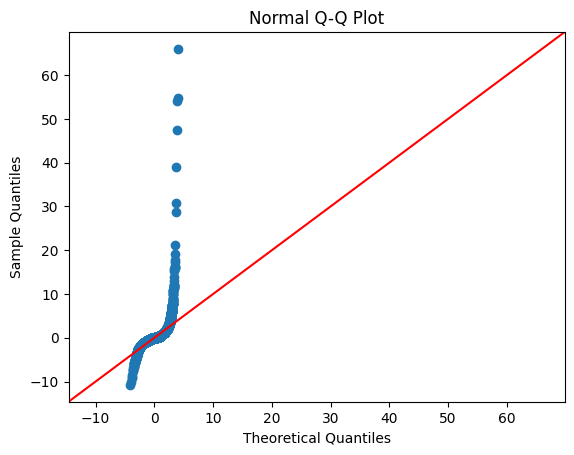

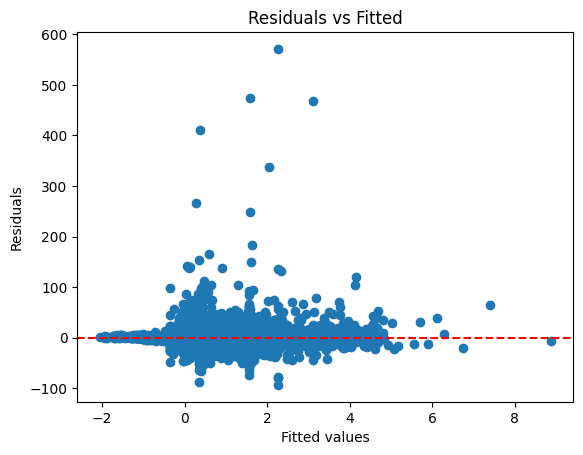

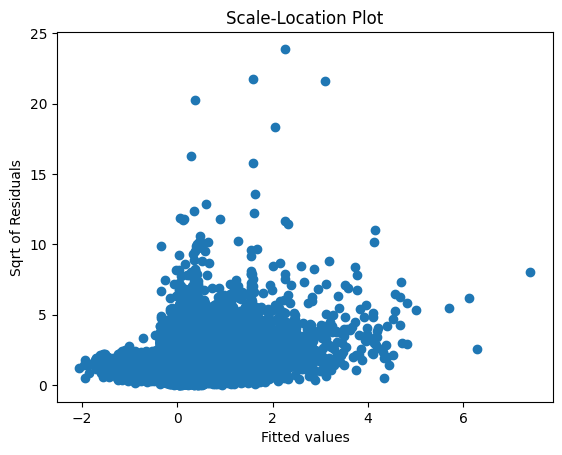

In [12]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_2.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_2.fittedvalues, model_2.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(model_2.fittedvalues, model_2.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
#sm.graphics.influence_plot(model_1, criterion="cooks")
#plt.title('Influence Plot')
#plt.show()

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['name_price_attention', 'crypto_dummy' ,  'Market_cap' , 'Volume']]

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

# Create a column in the dataframe that will contain the names of all the feature variables
vif["Features"] = X.columns

# Create a column in the dataframe that will contain the VIF values of the feature variables
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the dataframe
print(vif)


               Features       VIF
0  name_price_attention  1.023908
1          crypto_dummy  0.296835
2            Market_cap  2.517634
3                Volume  2.403592


The VIF values < 3 indicate no issues of multicollinearity in our independent variables. 

In [14]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model_2.resid, model_2.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 190.83513183756713, 'p-value': 3.667466383657686e-26, 'f-value': 6.8374965948975746, 'f p-value': 3.2191140242597617e-26}


The Breusch-Pagan test indicates that there is heteroscedasticity present in the data.

In [15]:
from scipy import stats

shapiro_test = stats.shapiro(model_2.resid)
print(f"Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

Shapiro-Wilk test statistic: 0.5511404871940613, p-value: 0.0


/Users/christel/Library/Python/3.9/lib/python/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


As these results still indicate heteroscedasticity and the presence of outliers in the data, we scaled the data to see if the performance improved.

**Scaling the data**

In [17]:
model_3 = ols('Q("return") ~  name_price_attention + C(crypto_dummy) + Volume  + Market_cap', data=df_scaled).fit() 

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     7.838
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           1.61e-31
Time:                        20:09:31   Log-Likelihood:                -71164.
No. Observations:               50427   AIC:                         1.424e+05
Df Residuals:                   50398   BIC:                         1.426e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0598      0.025     -2.429      0.015      -0.108      -0.012
C(crypto_dummy)[T.1]      0.3008      0.068      4.434      0.000       0.168       0.434
C(crypto_dummy)[T.2]      0.0236      0.038      0.627      0.530      -0.050       0.098
C(crypto_dummy)[T.3]      0.0826      0.032      2.562      0.010       0.019       0.146
C(crypto_dummy)[T.4]      0.0213      0.033      0.646      0.518      -0.043       0.086
C(crypto_dummy)[T.5]      0.0455      0.032      1.415      0.157      -0.018       0.109
C(crypto_dummy)[T.6]      0.0529      0.032      1.641      0.101      -0.010       0.116
C(crypto_dummy)[T.7]      0.0455      0.032      1.413      0.158      -0.018       0.109
C(crypto_dummy)[T.8]      0.0385      0.034      1.132      0.257      -0.028       0.105
C(crypto_dummy)[T.9]      0.0810      0.030      2.705      0.007       0.022       0.140
C(crypto_dummy)[T.10]     0.0732      0.031      2.339      0.019       0.012       0.134
C(crypto_dummy)[T.11]     0.0326      0.038      0.857      0.392      -0.042       0.107
C(crypto_dummy)[T.12]     0.0471      0.035      1.342      0.180      -0.022       0.116
C(crypto_dummy)[T.13]     0.0909      0.038      2.389      0.017       0.016       0.166
C(crypto_dummy)[T.14]     0.0459      0.030      1.535      0.125      -0.013       0.105
C(crypto_dummy)[T.15]     0.0624      0.038      1.640      0.101      -0.012       0.137
C(crypto_dummy)[T.16]     0.0100      0.037      0.267      0.789      -0.063       0.083
C(crypto_dummy)[T.17]     0.0841      0.034      2.450      0.014       0.017       0.151
C(crypto_dummy)[T.18]     0.0442      0.029      1.500      0.134      -0.014       0.102
C(crypto_dummy)[T.19]     0.2193      0.037      5.861      0.000       0.146       0.293
C(crypto_dummy)[T.20]     0.0595      0.036      1.636      0.102      -0.012       0.131
C(crypto_dummy)[T.21]     0.0444      0.035      1.260      0.208      -0.025       0.113
C(crypto_dummy)[T.22]     0.0849      0.030      2.836      0.005       0.026       0.144
C(crypto_dummy)[T.23]     0.0396      0.048      0.826      0.409      -0.054       0.134
C(crypto_dummy)[T.24]     0.0346      0.038      0.919      0.358      -0.039       0.108
C(crypto_dummy)[T.25]     0.0355      0.033      1.071      0.284      -0.029       0.100
name_price_attention      0.0500      0.005     10.494      0.000       0.041       0.059
Volume                    0.0366      0.007      5.215      0.000       0.023       0.050
Market_cap               -0.0358      0.007     -4.943      0.000      -0.050      -0.022
==============================================================================
Omnibus:                   107942.263   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarqu

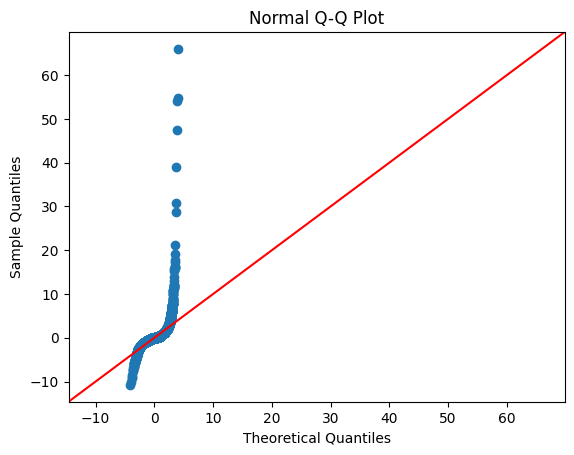

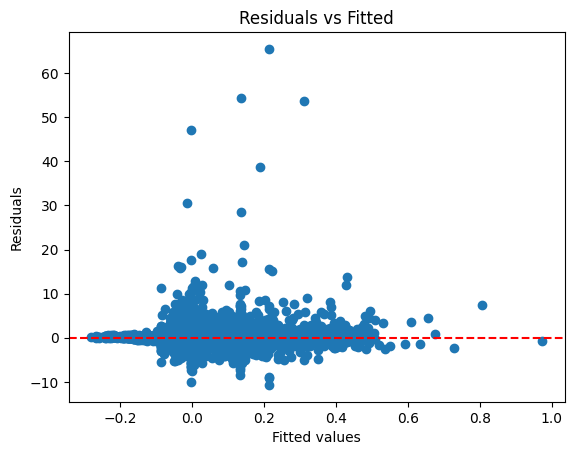

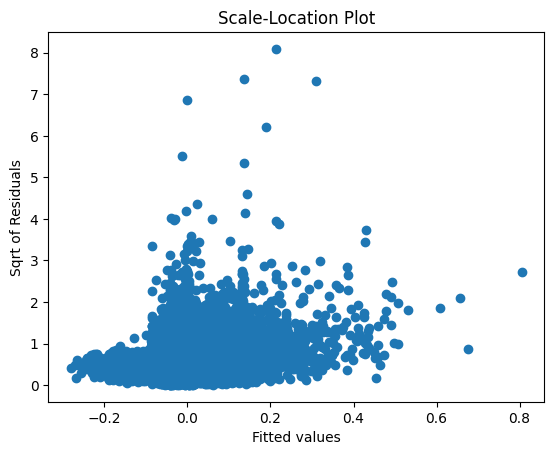

In [18]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_3.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_3.fittedvalues, model_3.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(model_3.fittedvalues, model_3.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
#sm.graphics.influence_plot(model_1, criterion="cooks")
#plt.title('Influence Plot')
#plt.show()

Given these test results it is clear that we need to further transform our data to make it more suitable for linear regression. We start by performing a log transformation on the target variable.

**Log Transformation of the target variable**

In [19]:
model_4 = ols('Q("log_return") ~  name_price_attention + C(crypto_dummy) + Volume + Market_cap' , data=df_scaled).fit() 

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("log_return")   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     53.53
Date:                Thu, 07 Mar 2024   Prob (F-statistic):          4.92e-294
Time:                        20:11:25   Log-Likelihood:                -71483.
No. Observations:               50427   AIC:                         1.430e+05
Df Residuals:                   50398   BIC:                         1.433e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.3943      0.025     15.923      0.000       0.346       0.443
C(crypto_dummy)[T.1]     -0.2703      0.068     -3.959      0.000      -0.404      -0.137
C(crypto_dummy)[T.2]      0.0368      0.038      0.971      0.331      -0.038       0.111
C(crypto_dummy)[T.3]     -0.0150      0.032     -0.463      0.643      -0.079       0.049
C(crypto_dummy)[T.4]     -0.3131      0.033     -9.436      0.000      -0.378      -0.248
C(crypto_dummy)[T.5]     -0.0107      0.032     -0.330      0.741      -0.074       0.053
C(crypto_dummy)[T.6]      0.0157      0.032      0.484      0.628      -0.048       0.079
C(crypto_dummy)[T.7]      0.1069      0.032      3.301      0.001       0.043       0.170
C(crypto_dummy)[T.8]      0.0764      0.034      2.235      0.025       0.009       0.143
C(crypto_dummy)[T.9]     -0.0505      0.030     -1.675      0.094      -0.110       0.009
C(crypto_dummy)[T.10]     0.0301      0.031      0.956      0.339      -0.032       0.092
C(crypto_dummy)[T.11]     0.0060      0.038      0.156      0.876      -0.069       0.081
C(crypto_dummy)[T.12]     0.0500      0.035      1.414      0.157      -0.019       0.119
C(crypto_dummy)[T.13]     0.2144      0.038      5.597      0.000       0.139       0.289
C(crypto_dummy)[T.14]    -0.0765      0.030     -2.542      0.011      -0.136      -0.018
C(crypto_dummy)[T.15]     0.1603      0.038      4.189      0.000       0.085       0.235
C(crypto_dummy)[T.16]    -0.0260      0.038     -0.691      0.490      -0.100       0.048
C(crypto_dummy)[T.17]     0.1529      0.035      4.427      0.000       0.085       0.221
C(crypto_dummy)[T.18]    -0.1420      0.030     -4.783      0.000      -0.200      -0.084
C(crypto_dummy)[T.19]     0.0901      0.038      2.392      0.017       0.016       0.164
C(crypto_dummy)[T.20]     0.1480      0.037      4.048      0.000       0.076       0.220
C(crypto_dummy)[T.21]     0.0817      0.035      2.303      0.021       0.012       0.151
C(crypto_dummy)[T.22]     0.0606      0.030      2.010      0.044       0.002       0.120
C(crypto_dummy)[T.23]    -0.0435      0.048     -0.902      0.367      -0.138       0.051
C(crypto_dummy)[T.24]     0.0568      0.038      1.498      0.134      -0.017       0.131
C(crypto_dummy)[T.25]     0.0569      0.033      1.706      0.088      -0.008       0.122
name_price_attention      0.1081      0.005     22.571      0.000       0.099       0.118
Volume                    0.0968      0.007     13.708      0.000       0.083       0.111
Market_cap               -0.0779      0.007    -10.679      0.000      -0.092      -0.064
==============================================================================
Omnibus:                     3929.485   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarqu

As we can see, the performance of our model has dramatically improved, now showing an R-squared value of 0.029 suggesting a much better model fit. 

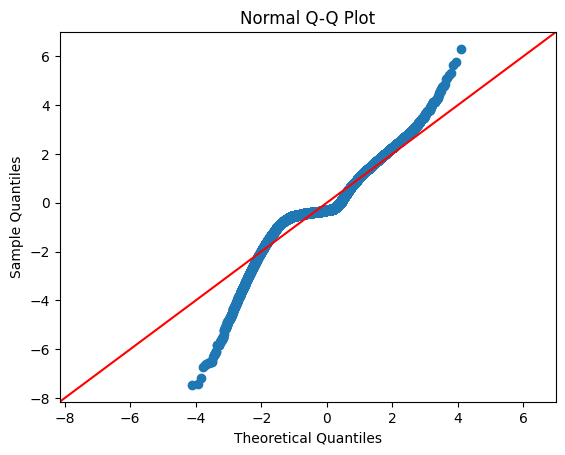

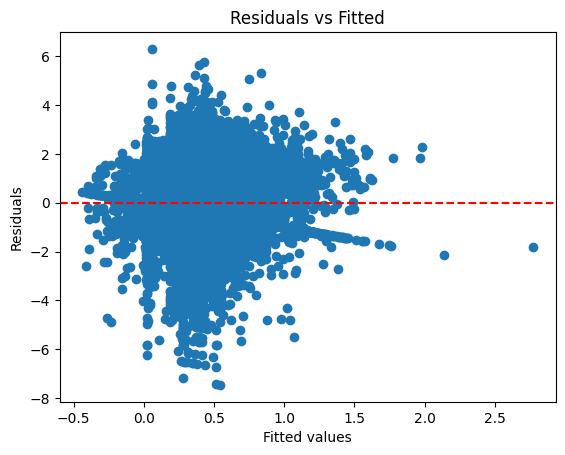

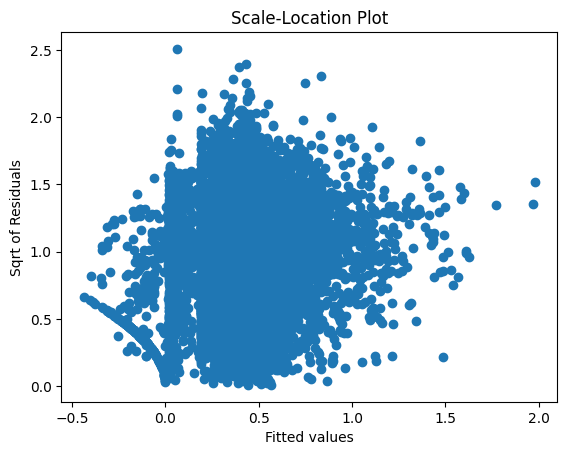

In [20]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_4.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_4.fittedvalues, model_4.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(model_4.fittedvalues, model_4.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
#sm.graphics.influence_plot(model_1, criterion="cooks")
#plt.title('Influence Plot')
#plt.show()

In [23]:
model_5 = ols('Q("return") ~  log_attention + C(crypto_dummy) + Volume + Market_cap' , data=df_scaled).fit() 
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.965
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           1.20e-16
Time:                        20:15:57   Log-Likelihood:                -71204.
No. Observations:               50427   AIC:                         1.425e+05
Df Residuals:                   50398   BIC:                         1.427e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0653      0.025     -2.580      0.010      -0.115      -0.016
C(crypto_dummy)[T.1]      0.2851      0.068      4.193      0.000       0.152       0.418
C(crypto_dummy)[T.2]      0.0281      0.038      0.745      0.456      -0.046       0.102
C(crypto_dummy)[T.3]      0.0664      0.032      2.053      0.040       0.003       0.130
C(crypto_dummy)[T.4]     -0.0008      0.033     -0.023      0.982      -0.066       0.064
C(crypto_dummy)[T.5]      0.0250      0.032      0.778      0.436      -0.038       0.088
C(crypto_dummy)[T.6]      0.0424      0.032      1.316      0.188      -0.021       0.106
C(crypto_dummy)[T.7]      0.0381      0.032      1.182      0.237      -0.025       0.101
C(crypto_dummy)[T.8]      0.0307      0.034      0.904      0.366      -0.036       0.097
C(crypto_dummy)[T.9]      0.0639      0.030      2.121      0.034       0.005       0.123
C(crypto_dummy)[T.10]     0.0575      0.032      1.825      0.068      -0.004       0.119
C(crypto_dummy)[T.11]     0.0146      0.038      0.385      0.700      -0.060       0.089
C(crypto_dummy)[T.12]     0.0350      0.035      0.992      0.321      -0.034       0.104
C(crypto_dummy)[T.13]     0.0801      0.038      2.099      0.036       0.005       0.155
C(crypto_dummy)[T.14]     0.0266      0.030      0.888      0.374      -0.032       0.085
C(crypto_dummy)[T.15]     0.0496      0.038      1.303      0.193      -0.025       0.124
C(crypto_dummy)[T.16]     0.0148      0.037      0.395      0.693      -0.059       0.088
C(crypto_dummy)[T.17]     0.0686      0.034      1.997      0.046       0.001       0.136
C(crypto_dummy)[T.18]     0.0275      0.029      0.933      0.351      -0.030       0.085
C(crypto_dummy)[T.19]     0.2010      0.037      5.378      0.000       0.128       0.274
C(crypto_dummy)[T.20]     0.0559      0.036      1.536      0.124      -0.015       0.127
C(crypto_dummy)[T.21]     0.0449      0.035      1.270      0.204      -0.024       0.114
C(crypto_dummy)[T.22]     0.0678      0.030      2.259      0.024       0.009       0.127
C(crypto_dummy)[T.23]     0.0181      0.048      0.377      0.706      -0.076       0.112
C(crypto_dummy)[T.24]     0.0247      0.038      0.656      0.512      -0.049       0.099
C(crypto_dummy)[T.25]     0.0227      0.033      0.685      0.494      -0.042       0.088
log_attention             0.0226      0.004      5.464      0.000       0.014       0.031
Volume                    0.0416      0.007      5.910      0.000       0.028       0.055
Market_cap               -0.0351      0.007     -4.817      0.000      -0.049      -0.021
==============================================================================
Omnibus:                   107926.960   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarqu

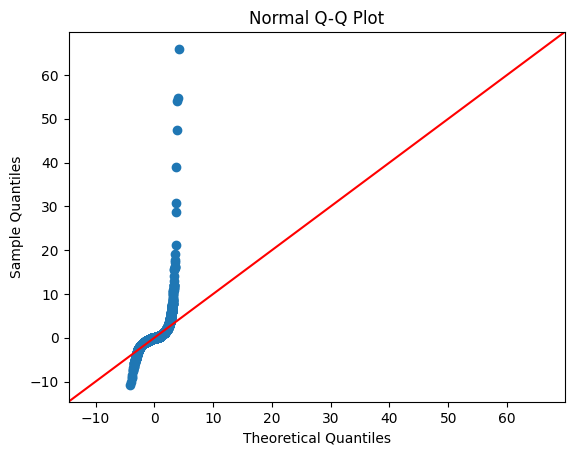

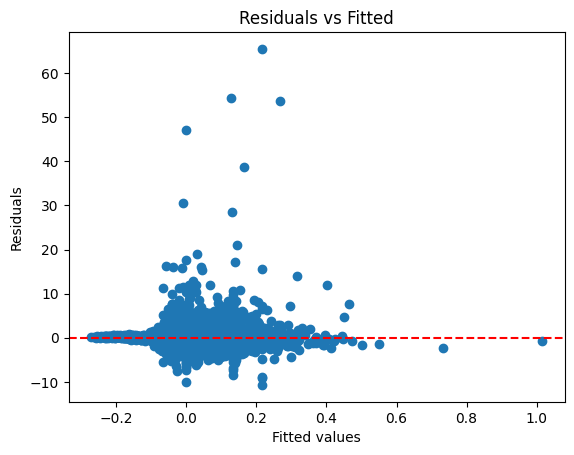

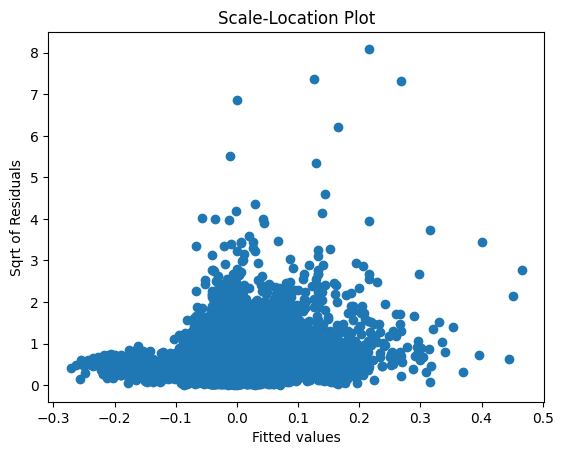

In [24]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_5.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_5.fittedvalues, model_5.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(model_5.fittedvalues, model_5.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
#sm.graphics.influence_plot(model_1, criterion="cooks")
#plt.title('Influence Plot')
#plt.show()

In [26]:
model_6 = ols('Q("log_return") ~  log_attention + C(crypto_dummy) + Volume + Market_cap' , data=df_scaled).fit() 

model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("log_return")   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     48.96
Date:                Thu, 07 Mar 2024   Prob (F-statistic):          1.73e-267
Time:                        20:28:37   Log-Likelihood:                -71546.
No. Observations:               50427   AIC:                         1.431e+05
Df Residuals:                   50398   BIC:                         1.434e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.3305      0.025     12.964      0.000       0.281       0.380
C(crypto_dummy)[T.1]     -0.2613      0.068     -3.818      0.000      -0.395      -0.127
C(crypto_dummy)[T.2]      0.0367      0.038      0.968      0.333      -0.038       0.111
C(crypto_dummy)[T.3]     -0.0170      0.033     -0.523      0.601      -0.081       0.047
C(crypto_dummy)[T.4]     -0.3195      0.033     -9.600      0.000      -0.385      -0.254
C(crypto_dummy)[T.5]     -0.0254      0.032     -0.784      0.433      -0.089       0.038
C(crypto_dummy)[T.6]      0.0161      0.032      0.497      0.619      -0.048       0.080
C(crypto_dummy)[T.7]      0.0947      0.032      2.920      0.003       0.031       0.158
C(crypto_dummy)[T.8]      0.0686      0.034      2.004      0.045       0.002       0.136
C(crypto_dummy)[T.9]     -0.0453      0.030     -1.495      0.135      -0.105       0.014
C(crypto_dummy)[T.10]     0.0415      0.032      1.309      0.190      -0.021       0.104
C(crypto_dummy)[T.11]    -0.0116      0.038     -0.303      0.762      -0.087       0.063
C(crypto_dummy)[T.12]     0.0541      0.035      1.525      0.127      -0.015       0.124
C(crypto_dummy)[T.13]     0.2208      0.038      5.747      0.000       0.145       0.296
C(crypto_dummy)[T.14]    -0.0848      0.030     -2.812      0.005      -0.144      -0.026
C(crypto_dummy)[T.15]     0.1644      0.038      4.283      0.000       0.089       0.240
C(crypto_dummy)[T.16]    -0.0199      0.038     -0.527      0.598      -0.094       0.054
C(crypto_dummy)[T.17]     0.1368      0.035      3.958      0.000       0.069       0.205
C(crypto_dummy)[T.18]    -0.1673      0.030     -5.640      0.000      -0.225      -0.109
C(crypto_dummy)[T.19]     0.0581      0.038      1.545      0.122      -0.016       0.132
C(crypto_dummy)[T.20]     0.1398      0.037      3.818      0.000       0.068       0.212
C(crypto_dummy)[T.21]     0.1022      0.036      2.874      0.004       0.033       0.172
C(crypto_dummy)[T.22]     0.0548      0.030      1.814      0.070      -0.004       0.114
C(crypto_dummy)[T.23]    -0.0650      0.048     -1.347      0.178      -0.160       0.030
C(crypto_dummy)[T.24]     0.0412      0.038      1.087      0.277      -0.033       0.116
C(crypto_dummy)[T.25]     0.0460      0.033      1.379      0.168      -0.019       0.111
log_attention             0.0816      0.004     19.592      0.000       0.073       0.090
Volume                    0.0979      0.007     13.817      0.000       0.084       0.112
Market_cap               -0.0833      0.007    -11.358      0.000      -0.098      -0.069
==============================================================================
Omnibus:                     3955.205   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarqu

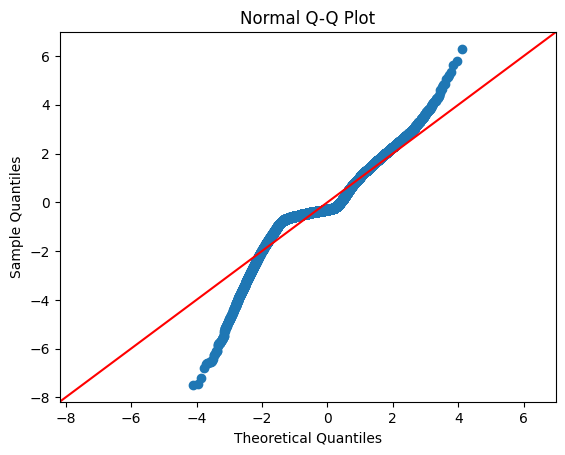

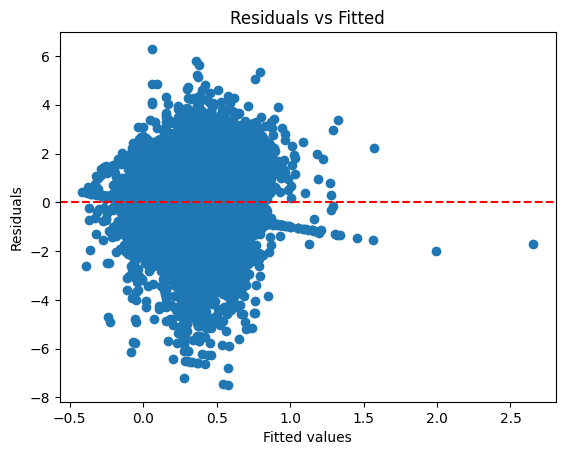

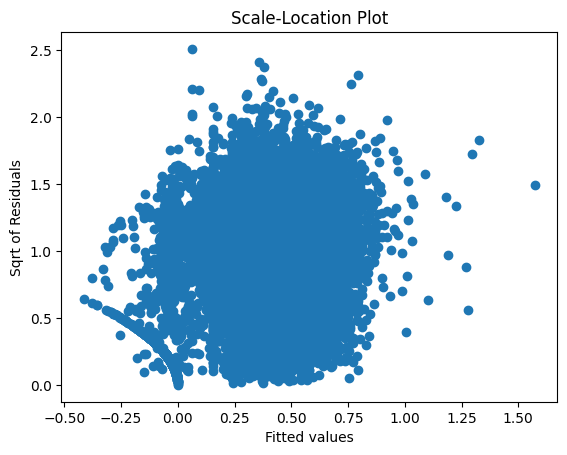

In [27]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_6.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_6.fittedvalues, model_6.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(model_6.fittedvalues, model_6.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
#sm.graphics.influence_plot(model_1, criterion="cooks")
#plt.title('Influence Plot')
#plt.show()

In [ ]:
# create a table that shows the results of all robust 
from statsmodels.iolib.summary2 import summary_col

# Assuming results1 to results8 are the fitted model results
results_list = [model_6, mode ]



# Create the regression table
regression_table = summary_col(results_list,
                               stars=True,
                               model_names=[
                                   'Robust model 7', 'Robust model 8', 'Robust Model 9'
                               ],
                               #float_format="%0.0002f",
                               info_dict={'N': lambda x: f"{int(x.nobs)}", 'R2': lambda x: f"{x.rsquared:.2f}"})

regression_table

The log transformations have significantly improved model fit. The model still shows signs of heteroscedasticity. Thus, we proceeded by using a regression model with heteroscedasticity robust standard errors.

In [277]:
# Robust standard errors log_return 
model_7 = ols('Q("log_return") ~  name_price_attention + C(crypto_dummy) + Volume + Market_cap' , data=df_scaled).fit() 
robust_model_7 = model_7.get_robustcov_results(cov_type='HC2')
robust_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("log_return")   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     45.51
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          1.91e-247
Time:                        12:03:58   Log-Likelihood:                -71483.
No. Observations:               50427   AIC:                         1.430e+05
Df Residuals:                   50398   BIC:                         1.433e+05
Df Model:                          28                                         
Covariance Type:                  HC2                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.3943      0.024     16.184      0.000       0.347       0.442
C(crypto_dummy)[T.1]     -0.2703      0.048     -5.682      0.000      -0.364      -0.177
C(crypto_dummy)[T.2]      0.0368      0.038      0.982      0.326      -0.037       0.110
C(crypto_dummy)[T.3]     -0.0150      0.033     -0.459      0.646      -0.079       0.049
C(crypto_dummy)[T.4]     -0.3131      0.033     -9.555      0.000      -0.377      -0.249
C(crypto_dummy)[T.5]     -0.0107      0.032     -0.336      0.737      -0.073       0.052
C(crypto_dummy)[T.6]      0.0157      0.032      0.489      0.625      -0.047       0.078
C(crypto_dummy)[T.7]      0.1069      0.032      3.293      0.001       0.043       0.170
C(crypto_dummy)[T.8]      0.0764      0.034      2.241      0.025       0.010       0.143
C(crypto_dummy)[T.9]     -0.0505      0.030     -1.658      0.097      -0.110       0.009
C(crypto_dummy)[T.10]     0.0301      0.031      0.970      0.332      -0.031       0.091
C(crypto_dummy)[T.11]     0.0060      0.037      0.159      0.874      -0.068       0.079
C(crypto_dummy)[T.12]     0.0500      0.035      1.436      0.151      -0.018       0.118
C(crypto_dummy)[T.13]     0.2144      0.040      5.340      0.000       0.136       0.293
C(crypto_dummy)[T.14]    -0.0765      0.030     -2.589      0.010      -0.134      -0.019
C(crypto_dummy)[T.15]     0.1603      0.039      4.115      0.000       0.084       0.237
C(crypto_dummy)[T.16]    -0.0260      0.036     -0.724      0.469      -0.096       0.044
C(crypto_dummy)[T.17]     0.1529      0.035      4.380      0.000       0.085       0.221
C(crypto_dummy)[T.18]    -0.1420      0.029     -4.876      0.000      -0.199      -0.085
C(crypto_dummy)[T.19]     0.0901      0.039      2.284      0.022       0.013       0.167
C(crypto_dummy)[T.20]     0.1480      0.037      3.973      0.000       0.075       0.221
C(crypto_dummy)[T.21]     0.0817      0.036      2.263      0.024       0.011       0.152
C(crypto_dummy)[T.22]     0.0606      0.030      2.028      0.043       0.002       0.119
C(crypto_dummy)[T.23]    -0.0435      0.049     -0.881      0.378      -0.140       0.053
C(crypto_dummy)[T.24]     0.0568      0.037      1.524      0.128      -0.016       0.130
C(crypto_dummy)[T.25]     0.0569      0.032      1.770      0.077      -0.006       0.120
name_price_attention      0.1081      0.006     18.744      0.000       0.097       0.119
Volume                    0.0968      0.008     11.983      0.000       0.081       0.113
Market_cap               -0.0779      0.007    -10.602      0.000      -0.092      -0.063
==============================================================================
Omnibus:                     3929.485   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarqu

In [278]:
# Robust standard errors log_attention
model_8 = ols('Q("return") ~  log_attention + C(crypto_dummy) + Volume + Market_cap' , data=df_scaled).fit() 
robust_model_8 = model_8.get_robustcov_results(cov_type='HC2')
robust_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.086
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           0.000652
Time:                        12:04:01   Log-Likelihood:                -71204.
No. Observations:               50427   AIC:                         1.425e+05
Df Residuals:                   50398   BIC:                         1.427e+05
Df Model:                          28                                         
Covariance Type:                  HC2                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0653      0.020     -3.231      0.001      -0.105      -0.026
C(crypto_dummy)[T.1]      0.2851      0.285      0.999      0.318      -0.274       0.844
C(crypto_dummy)[T.2]      0.0281      0.030      0.941      0.347      -0.030       0.087
C(crypto_dummy)[T.3]      0.0664      0.028      2.390      0.017       0.012       0.121
C(crypto_dummy)[T.4]     -0.0008      0.022     -0.033      0.973      -0.045       0.043
C(crypto_dummy)[T.5]      0.0250      0.027      0.933      0.351      -0.028       0.078
C(crypto_dummy)[T.6]      0.0424      0.025      1.688      0.091      -0.007       0.092
C(crypto_dummy)[T.7]      0.0381      0.025      1.524      0.128      -0.011       0.087
C(crypto_dummy)[T.8]      0.0307      0.027      1.147      0.251      -0.022       0.083
C(crypto_dummy)[T.9]      0.0639      0.027      2.364      0.018       0.011       0.117
C(crypto_dummy)[T.10]     0.0575      0.027      2.149      0.032       0.005       0.110
C(crypto_dummy)[T.11]     0.0146      0.031      0.475      0.635      -0.046       0.075
C(crypto_dummy)[T.12]     0.0350      0.028      1.233      0.217      -0.021       0.091
C(crypto_dummy)[T.13]     0.0801      0.032      2.516      0.012       0.018       0.142
C(crypto_dummy)[T.14]     0.0266      0.022      1.201      0.230      -0.017       0.070
C(crypto_dummy)[T.15]     0.0496      0.030      1.638      0.101      -0.010       0.109
C(crypto_dummy)[T.16]     0.0148      0.027      0.548      0.584      -0.038       0.068
C(crypto_dummy)[T.17]     0.0686      0.029      2.367      0.018       0.012       0.125
C(crypto_dummy)[T.18]     0.0275      0.023      1.214      0.225      -0.017       0.072
C(crypto_dummy)[T.19]     0.2010      0.082      2.450      0.014       0.040       0.362
C(crypto_dummy)[T.20]     0.0559      0.029      1.899      0.058      -0.002       0.114
C(crypto_dummy)[T.21]     0.0449      0.030      1.519      0.129      -0.013       0.103
C(crypto_dummy)[T.22]     0.0678      0.029      2.377      0.017       0.012       0.124
C(crypto_dummy)[T.23]     0.0181      0.054      0.336      0.737      -0.088       0.124
C(crypto_dummy)[T.24]     0.0247      0.029      0.839      0.401      -0.033       0.082
C(crypto_dummy)[T.25]     0.0227      0.024      0.929      0.353      -0.025       0.071
log_attention             0.0226      0.005      4.413      0.000       0.013       0.033
Volume                    0.0416      0.010      4.196      0.000       0.022       0.061
Market_cap               -0.0351      0.007     -4.760      0.000      -0.050      -0.021
==============================================================================
Omnibus:                   107926.960   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarqu

In [279]:
# Robust standard errors log_return, log_attention
model_9 = ols('Q("log_return") ~  log_attention + C(crypto_dummy) + Volume + Market_cap' , data=df_scaled).fit() 
robust_model_9 = model_7.get_robustcov_results(cov_type='HC2')
robust_model_9.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("log_return")   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     45.51
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          1.91e-247
Time:                        12:04:02   Log-Likelihood:                -71483.
No. Observations:               50427   AIC:                         1.430e+05
Df Residuals:                   50398   BIC:                         1.433e+05
Df Model:                          28                                         
Covariance Type:                  HC2                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.3943      0.024     16.184      0.000       0.347       0.442
C(crypto_dummy)[T.1]     -0.2703      0.048     -5.682      0.000      -0.364      -0.177
C(crypto_dummy)[T.2]      0.0368      0.038      0.982      0.326      -0.037       0.110
C(crypto_dummy)[T.3]     -0.0150      0.033     -0.459      0.646      -0.079       0.049
C(crypto_dummy)[T.4]     -0.3131      0.033     -9.555      0.000      -0.377      -0.249
C(crypto_dummy)[T.5]     -0.0107      0.032     -0.336      0.737      -0.073       0.052
C(crypto_dummy)[T.6]      0.0157      0.032      0.489      0.625      -0.047       0.078
C(crypto_dummy)[T.7]      0.1069      0.032      3.293      0.001       0.043       0.170
C(crypto_dummy)[T.8]      0.0764      0.034      2.241      0.025       0.010       0.143
C(crypto_dummy)[T.9]     -0.0505      0.030     -1.658      0.097      -0.110       0.009
C(crypto_dummy)[T.10]     0.0301      0.031      0.970      0.332      -0.031       0.091
C(crypto_dummy)[T.11]     0.0060      0.037      0.159      0.874      -0.068       0.079
C(crypto_dummy)[T.12]     0.0500      0.035      1.436      0.151      -0.018       0.118
C(crypto_dummy)[T.13]     0.2144      0.040      5.340      0.000       0.136       0.293
C(crypto_dummy)[T.14]    -0.0765      0.030     -2.589      0.010      -0.134      -0.019
C(crypto_dummy)[T.15]     0.1603      0.039      4.115      0.000       0.084       0.237
C(crypto_dummy)[T.16]    -0.0260      0.036     -0.724      0.469      -0.096       0.044
C(crypto_dummy)[T.17]     0.1529      0.035      4.380      0.000       0.085       0.221
C(crypto_dummy)[T.18]    -0.1420      0.029     -4.876      0.000      -0.199      -0.085
C(crypto_dummy)[T.19]     0.0901      0.039      2.284      0.022       0.013       0.167
C(crypto_dummy)[T.20]     0.1480      0.037      3.973      0.000       0.075       0.221
C(crypto_dummy)[T.21]     0.0817      0.036      2.263      0.024       0.011       0.152
C(crypto_dummy)[T.22]     0.0606      0.030      2.028      0.043       0.002       0.119
C(crypto_dummy)[T.23]    -0.0435      0.049     -0.881      0.378      -0.140       0.053
C(crypto_dummy)[T.24]     0.0568      0.037      1.524      0.128      -0.016       0.130
C(crypto_dummy)[T.25]     0.0569      0.032      1.770      0.077      -0.006       0.120
name_price_attention      0.1081      0.006     18.744      0.000       0.097       0.119
Volume                    0.0968      0.008     11.983      0.000       0.081       0.113
Market_cap               -0.0779      0.007    -10.602      0.000      -0.092      -0.063
==============================================================================
Omnibus:                     3929.485   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarqu

In [280]:
# create a table that shows the results of all robust 
from statsmodels.iolib.summary2 import summary_col

# Assuming results1 to results8 are the fitted model results
results_list = [robust_model_7, robust_model_8, robust_model_9 ]



# Create the regression table
regression_table = summary_col(results_list,
                               stars=True,
                               model_names=[
                                   'Robust model 7', 'Robust model 8', 'Robust Model 9'
                               ],
                               #float_format="%0.0002f",
                               info_dict={'N': lambda x: f"{int(x.nobs)}", 'R2': lambda x: f"{x.rsquared:.2f}"})

regression_table

,Robust model 7,Robust model 8,Robust Model 9
C(crypto_dummy)[T.10],0.0301,0.0575**,0.0301
,(0.0310),(0.0268),(0.0310)
C(crypto_dummy)[T.11],0.0060,0.0146,0.0060
,(0.0375),(0.0308),(0.0375)
C(crypto_dummy)[T.12],0.0500,0.0350,0.0500
,(0.0348),(0.0283),(0.0348)
C(crypto_dummy)[T.13],0.2144***,0.0801**,0.2144***
,(0.0402),(0.0318),(0.0402)
C(crypto_dummy)[T.14],-0.0765***,0.0266,-0.0765***
,(0.0296),(0.0222),(0.0296)


As there is heteroscedasticity present in the data, we conclude the model with heteroscedasticity robust standard errors to be the best model and proceeded with the analysis.

To deal with the outliers and influential observations that induce heteroscedasticity we ran a robust regression model that is less sensitive to outliers and influential observations.

## Robust Regression

In [281]:
# Robust Regression 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the formula
formula = 'Q("log_return") ~  name_price_attention + C(crypto_dummy) + Volume + Market_cap' 

# Fit the model using RLM for a robust regression
model_rlm1 = smf.rlm(formula, data=df_scaled, M=sm.robust.norms.HuberT())
results_rlm1 = model_rlm1.fit()

# Print the summary
results_rlm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:        Q("log_return")   No. Observations:                50427
Model:                            RLM   Df Residuals:                    50398
Method:                          IRLS   Df Model:                           28
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 08 Mar 2024                                         
Time:                        12:08:37                                         
No. Iterations:                    41                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2651      0.016     16.213      0.000       0.233       0.297
C(crypto_dummy)[T.1]     -0.2284      0.045     -5.066      0.000      -0.317      -0.140
C(crypto_dummy)[T.2]      0.0015      0.025      0.061      0.951      -0.048       0.051
C(crypto_dummy)[T.3]     -0.0155      0.021     -0.724      0.469      -0.058       0.026
C(crypto_dummy)[T.4]     -0.1783      0.022     -8.138      0.000      -0.221      -0.135
C(crypto_dummy)[T.5]     -0.0219      0.021     -1.026      0.305      -0.064       0.020
C(crypto_dummy)[T.6]      0.0006      0.021      0.029      0.977      -0.041       0.043
C(crypto_dummy)[T.7]      0.0617      0.021      2.886      0.004       0.020       0.104
C(crypto_dummy)[T.8]      0.0358      0.023      1.587      0.113      -0.008       0.080
C(crypto_dummy)[T.9]     -0.0503      0.020     -2.526      0.012      -0.089      -0.011
C(crypto_dummy)[T.10]    -0.0071      0.021     -0.340      0.734      -0.048       0.034
C(crypto_dummy)[T.11]    -0.0046      0.025     -0.184      0.854      -0.054       0.045
C(crypto_dummy)[T.12]     0.0234      0.023      1.003      0.316      -0.022       0.069
C(crypto_dummy)[T.13]     0.0865      0.025      3.419      0.001       0.037       0.136
C(crypto_dummy)[T.14]    -0.0563      0.020     -2.833      0.005      -0.095      -0.017
C(crypto_dummy)[T.15]     0.0685      0.025      2.712      0.007       0.019       0.118
C(crypto_dummy)[T.16]    -0.0079      0.025     -0.320      0.749      -0.057       0.041
C(crypto_dummy)[T.17]     0.0725      0.023      3.180      0.001       0.028       0.117
C(crypto_dummy)[T.18]    -0.1032      0.020     -5.269      0.000      -0.142      -0.065
C(crypto_dummy)[T.19]    -0.0103      0.025     -0.414      0.679      -0.059       0.038
C(crypto_dummy)[T.20]     0.0599      0.024      2.480      0.013       0.013       0.107
C(crypto_dummy)[T.21]     0.0317      0.023      1.353      0.176      -0.014       0.078
C(crypto_dummy)[T.22]     0.0070      0.020      0.354      0.723      -0.032       0.046
C(crypto_dummy)[T.23]    -0.0338      0.032     -1.061      0.289      -0.096       0.029
C(crypto_dummy)[T.24]     0.0344      0.025      1.377      0.169      -0.015       0.083
C(crypto_dummy)[T.25]     0.0201      0.022      0.912      0.362      -0.023       0.063
name_price_attention      0.0612      0.003     19.340      0.000       0.055       0.067
Volume                    0.0496      0.005     10.642      0.000       0.040       0.059
Market_cap               -0.0363      0.005     -7.537      0.000      -0.046      -0.027
=========================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might no

In [34]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np


# Weighted Residual Sum of Squares (RSS)
RSS = sum(results_rlm1.weights * results_rlm1.resid ** 2)

# Total Sum of Squares (TSS) - weighted by the model weights since it's RLM
TSS = sum(results_rlm1.weights * (df_scaled['log_return'] - np.average(df_scaled['log_return'], weights=results_rlm1.weights)) ** 2)

# Calculate the weighted R-squared
weighted_r_squared = 1 - RSS / TSS

# Calculate pseudo R-squared as if it were OLS

print(f'Weighted R-squared: {weighted_r_squared:.4f}')

# Check out the model's predictions compared to actual values
predictions = results_rlm1.predict(df_scaled)
actual_values = df_scaled['log_return']

# Calculate Mean Squared Error (MSE)
mse = sm.tools.eval_measures.mse(actual_values, predictions)


print(f'Mean Squared Error: {mse:.4f}')

Weighted R-squared: 0.0188
Mean Squared Error: 1.0242


The robust model is heteroscedasticity consistent and more robust to outliers and influential observations. Thus, we conclude the robust model to be the best model.

# Robustness Tests

To test our model's robustness, we exluded variables and compared the regression results to see whether the impact of attention on the target variable is consistent across different model specifications.

In [283]:
# Define the formula
formula = 'Q("log_return") ~ C(crypto_dummy) + name_price_attention'

# Fit the model using RLM for a robust regression
model_rlm2 = smf.rlm(formula, data=df_scaled, M=sm.robust.norms.HuberT())
results_rlm2 = model_rlm2.fit()

# Print the summary
results_rlm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:        Q("log_return")   No. Observations:                50427
Model:                            RLM   Df Residuals:                    50400
Method:                          IRLS   Df Model:                           26
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 08 Mar 2024                                         
Time:                        12:22:38                                         
No. Iterations:                    42                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2548      0.016     15.876      0.000       0.223       0.286
C(crypto_dummy)[T.1]     -0.2219      0.044     -4.997      0.000      -0.309      -0.135
C(crypto_dummy)[T.2]      0.0004      0.025      0.018      0.986      -0.048       0.049
C(crypto_dummy)[T.3]     -0.0160      0.021     -0.758      0.448      -0.057       0.025
C(crypto_dummy)[T.4]     -0.1499      0.019     -7.790      0.000      -0.188      -0.112
C(crypto_dummy)[T.5]     -0.0076      0.021     -0.364      0.716      -0.049       0.033
C(crypto_dummy)[T.6]      0.0034      0.021      0.161      0.872      -0.038       0.045
C(crypto_dummy)[T.7]      0.0638      0.021      3.029      0.002       0.023       0.105
C(crypto_dummy)[T.8]      0.0374      0.022      1.683      0.092      -0.006       0.081
C(crypto_dummy)[T.9]     -0.0450      0.020     -2.301      0.021      -0.083      -0.007
C(crypto_dummy)[T.10]     0.0010      0.020      0.047      0.963      -0.039       0.041
C(crypto_dummy)[T.11]    -0.0011      0.025     -0.044      0.965      -0.050       0.048
C(crypto_dummy)[T.12]     0.0251      0.023      1.090      0.276      -0.020       0.070
C(crypto_dummy)[T.13]     0.0863      0.025      3.465      0.001       0.037       0.135
C(crypto_dummy)[T.14]    -0.0449      0.020     -2.297      0.022      -0.083      -0.007
C(crypto_dummy)[T.15]     0.0696      0.025      2.800      0.005       0.021       0.118
C(crypto_dummy)[T.16]    -0.0081      0.024     -0.330      0.742      -0.056       0.040
C(crypto_dummy)[T.17]     0.0744      0.022      3.311      0.001       0.030       0.118
C(crypto_dummy)[T.18]    -0.0942      0.019     -4.889      0.000      -0.132      -0.056
C(crypto_dummy)[T.19]    -0.0072      0.024     -0.293      0.770      -0.055       0.041
C(crypto_dummy)[T.20]     0.0598      0.024      2.516      0.012       0.013       0.106
C(crypto_dummy)[T.21]     0.0312      0.023      1.354      0.176      -0.014       0.076
C(crypto_dummy)[T.22]     0.0100      0.020      0.509      0.611      -0.028       0.048
C(crypto_dummy)[T.23]    -0.0301      0.031     -0.959      0.338      -0.092       0.031
C(crypto_dummy)[T.24]     0.0349      0.025      1.416      0.157      -0.013       0.083
C(crypto_dummy)[T.25]     0.0220      0.022      1.013      0.311      -0.021       0.064
name_price_attention      0.0642      0.003     21.394      0.000       0.058       0.070
=========================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [284]:
# Define the formula
formula = 'Q("log_return") ~ C(crypto_dummy) + name_price_attention + Market_cap'

# Fit the model using RLM for a robust regression
model_rlm3 = smf.rlm(formula, data=df_scaled, M=sm.robust.norms.HuberT())
results_rlm3 = model_rlm3.fit()

# Print the summary
results_rlm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:        Q("log_return")   No. Observations:                50427
Model:                            RLM   Df Residuals:                    50399
Method:                          IRLS   Df Model:                           27
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 08 Mar 2024                                         
Time:                        12:22:49                                         
No. Iterations:                    50                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2530      0.016     15.721      0.000       0.221       0.285
C(crypto_dummy)[T.1]     -0.2209      0.044     -4.973      0.000      -0.308      -0.134
C(crypto_dummy)[T.2]      0.0004      0.025      0.015      0.988      -0.048       0.049
C(crypto_dummy)[T.3]     -0.0138      0.021     -0.653      0.514      -0.055       0.028
C(crypto_dummy)[T.4]     -0.1364      0.021     -6.411      0.000      -0.178      -0.095
C(crypto_dummy)[T.5]     -0.0065      0.021     -0.308      0.758      -0.048       0.035
C(crypto_dummy)[T.6]      0.0046      0.021      0.219      0.826      -0.037       0.046
C(crypto_dummy)[T.7]      0.0641      0.021      3.045      0.002       0.023       0.105
C(crypto_dummy)[T.8]      0.0378      0.022      1.702      0.089      -0.006       0.081
C(crypto_dummy)[T.9]     -0.0438      0.020     -2.234      0.025      -0.082      -0.005
C(crypto_dummy)[T.10]     0.0021      0.020      0.101      0.920      -0.038       0.042
C(crypto_dummy)[T.11]    -0.0003      0.025     -0.011      0.991      -0.049       0.048
C(crypto_dummy)[T.12]     0.0259      0.023      1.125      0.261      -0.019       0.071
C(crypto_dummy)[T.13]     0.0869      0.025      3.490      0.000       0.038       0.136
C(crypto_dummy)[T.14]    -0.0438      0.020     -2.240      0.025      -0.082      -0.005
C(crypto_dummy)[T.15]     0.0705      0.025      2.832      0.005       0.022       0.119
C(crypto_dummy)[T.16]    -0.0077      0.024     -0.313      0.754      -0.056       0.040
C(crypto_dummy)[T.17]     0.0752      0.022      3.345      0.001       0.031       0.119
C(crypto_dummy)[T.18]    -0.0930      0.019     -4.825      0.000      -0.131      -0.055
C(crypto_dummy)[T.19]    -0.0064      0.024     -0.263      0.793      -0.054       0.042
C(crypto_dummy)[T.20]     0.0604      0.024      2.541      0.011       0.014       0.107
C(crypto_dummy)[T.21]     0.0315      0.023      1.364      0.173      -0.014       0.077
C(crypto_dummy)[T.22]     0.0109      0.020      0.557      0.577      -0.027       0.049
C(crypto_dummy)[T.23]    -0.0293      0.031     -0.933      0.351      -0.091       0.032
C(crypto_dummy)[T.24]     0.0354      0.025      1.438      0.150      -0.013       0.084
C(crypto_dummy)[T.25]     0.0226      0.022      1.042      0.297      -0.020       0.065
name_price_attention      0.0655      0.003     21.299      0.000       0.059       0.072
Market_cap               -0.0056      0.004     -1.488      0.137      -0.013       0.002
=========================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [285]:
# Define the formula
formula = 'Q("log_return") ~ C(crypto_dummy) + name_price_attention + Volume'

# Fit the model using RLM for a robust regression
model_rlm4 = smf.rlm(formula, data=df_scaled, M=sm.robust.norms.HuberT())
results_rlm4 = model_rlm4.fit()

# Print the summary
results_rlm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:        Q("log_return")   No. Observations:                50427
Model:                            RLM   Df Residuals:                    50399
Method:                          IRLS   Df Model:                           27
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 08 Mar 2024                                         
Time:                        12:22:55                                         
No. Iterations:                    44                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2667      0.016     16.448      0.000       0.235       0.299
C(crypto_dummy)[T.1]     -0.2289      0.045     -5.118      0.000      -0.317      -0.141
C(crypto_dummy)[T.2]      0.0013      0.025      0.052      0.959      -0.047       0.050
C(crypto_dummy)[T.3]     -0.0235      0.021     -1.107      0.268      -0.065       0.018
C(crypto_dummy)[T.4]     -0.2134      0.021    -10.078      0.000      -0.255      -0.172
C(crypto_dummy)[T.5]     -0.0197      0.021     -0.927      0.354      -0.061       0.022
C(crypto_dummy)[T.6]     -0.0025      0.021     -0.118      0.906      -0.044       0.039
C(crypto_dummy)[T.7]      0.0613      0.021      2.891      0.004       0.020       0.103
C(crypto_dummy)[T.8]      0.0350      0.022      1.564      0.118      -0.009       0.079
C(crypto_dummy)[T.9]     -0.0524      0.020     -2.655      0.008      -0.091      -0.014
C(crypto_dummy)[T.10]    -0.0074      0.021     -0.358      0.720      -0.048       0.033
C(crypto_dummy)[T.11]    -0.0060      0.025     -0.238      0.812      -0.055       0.043
C(crypto_dummy)[T.12]     0.0213      0.023      0.918      0.359      -0.024       0.067
C(crypto_dummy)[T.13]     0.0842      0.025      3.355      0.001       0.035       0.133
C(crypto_dummy)[T.14]    -0.0550      0.020     -2.786      0.005      -0.094      -0.016
C(crypto_dummy)[T.15]     0.0661      0.025      2.635      0.008       0.017       0.115
C(crypto_dummy)[T.16]    -0.0095      0.025     -0.386      0.700      -0.058       0.039
C(crypto_dummy)[T.17]     0.0706      0.023      3.118      0.002       0.026       0.115
C(crypto_dummy)[T.18]    -0.1032      0.019     -5.309      0.000      -0.141      -0.065
C(crypto_dummy)[T.19]    -0.0116      0.025     -0.469      0.639      -0.060       0.037
C(crypto_dummy)[T.20]     0.0575      0.024      2.401      0.016       0.011       0.104
C(crypto_dummy)[T.21]     0.0306      0.023      1.318      0.188      -0.015       0.076
C(crypto_dummy)[T.22]     0.0050      0.020      0.251      0.802      -0.034       0.044
C(crypto_dummy)[T.23]    -0.0350      0.032     -1.106      0.269      -0.097       0.027
C(crypto_dummy)[T.24]     0.0327      0.025      1.317      0.188      -0.016       0.081
C(crypto_dummy)[T.25]     0.0187      0.022      0.856      0.392      -0.024       0.061
name_price_attention      0.0578      0.003     18.471      0.000       0.052       0.064
Volume                    0.0271      0.004      7.445      0.000       0.020       0.034
=========================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [286]:
# create a table that shows the results of all robust 
from statsmodels.iolib.summary2 import summary_col

# Assuming results1 to results8 are the fitted model results
results_list = [results_rlm2, results_rlm3, results_rlm4]



# Create the regression table
regression_table = summary_col(results_list,
                               stars=True,
                               model_names=[
                                   'Robust Regression Model 2', 'Robust Regression Model 3', 'Robust Regression Model 4'],
                               #float_format="%0.0002f",
                               info_dict={'N': lambda x: f"{int(x.nobs)}", 'R2': lambda x: f"{x.rsquared:.2f}"})

regression_table

,Robust Regression Model 2,Robust Regression Model 3,Robust Regression Model 4
C(crypto_dummy)[T.10],0.0010,0.0021,-0.0074
,(0.0204),(0.0205),(0.0206)
C(crypto_dummy)[T.11],-0.0011,-0.0003,-0.0060
,(0.0249),(0.0249),(0.0251)
C(crypto_dummy)[T.12],0.0251,0.0259,0.0213
,(0.0230),(0.0230),(0.0232)
C(crypto_dummy)[T.13],0.0863***,0.0869***,0.0842***
,(0.0249),(0.0249),(0.0251)
C(crypto_dummy)[T.14],-0.0449**,-0.0438**,-0.0550***
,(0.0195),(0.0195),(0.0197)


As we can see from the comparison, the impact of attention on the target variable is consistent across different model specifications. The magnitude changes slightly, while the direction of the relationship remains the same.

## Testing Robustness with pre-covid data

In [289]:
df_pre_covid = df_scaled[df_scaled['Date'] < '2020-03-01']

In [290]:
# Univariate Model
# Define the formula
formula = 'Q("log_return") ~ C(crypto_dummy) + name_price_attention'

# Fit the model using RLM for a robust regression
model_rlm5 = smf.rlm(formula, data=df_pre_covid, M=sm.robust.norms.HuberT())
results_rlm5 = model_rlm2.fit()

In [291]:
# Bivariate Model excluding Volume
# Define the formula
formula = 'Q("log_return") ~ C(crypto_dummy) + name_price_attention + Market_cap'

# Fit the model using RLM for a robust regression
model_rlm6 = smf.rlm(formula, data=df_pre_covid, M=sm.robust.norms.HuberT())
results_rlm6 = model_rlm6.fit()

In [292]:
# Bivariate Model excluding Market_cap
# Define the formula
formula = 'Q("log_return") ~ C(crypto_dummy) + name_price_attention + Volume'

# Fit the model using RLM for a robust regression
model_rlm7 = smf.rlm(formula, data=df_pre_covid, M=sm.robust.norms.HuberT())
results_rlm7 = model_rlm7.fit()


In [293]:
# Assuming results1 to results8 are the fitted model results
results_list = [results_rlm5, results_rlm6, results_rlm7]



# Create the regression table
regression_table = summary_col(results_list,
                               stars=True,
                               model_names=[
                                   'Robust Regression Model 5', 'Robust Regression Model 6', 'Robust Regression Model 7'],
                               #float_format="%0.0002f",
                               info_dict={'N': lambda x: f"{int(x.nobs)}", 'R2': lambda x: f"{x.rsquared:.2f}"})

regression_table

,Robust Regression Model 5,Robust Regression Model 6,Robust Regression Model 7
C(crypto_dummy)[T.10],0.0010,-0.0397,-0.0402
,(0.0204),(0.0343),(0.0343)
C(crypto_dummy)[T.11],-0.0011,,
,(0.0249),,
C(crypto_dummy)[T.12],0.0251,-0.0758,-0.0743
,(0.0230),(0.0500),(0.0500)
C(crypto_dummy)[T.13],0.0863***,,
,(0.0249),,
C(crypto_dummy)[T.14],-0.0449**,-0.1250***,-0.1252***
,(0.0195),(0.0333),(0.0333)


# Non-linear model 
**Gradient Boosting Regressor**
Based on the results of our best fiting model, namely our robust model, we can conclude that there is a statistically significant effect of the attention of retail investors on crypto. The effect however seems to be very low. In order to see the hierarchical feature importance we now perform a gradient boosting regressor.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

In [51]:
#splitting the data

fix_seed = 32
#X = df['name_price_attention']  # Extracting the feature
X = df_scaled[['name_price_attention', 'Market_cap', 'Volume']] 
y = df_scaled['log_return']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=fix_seed)

In [52]:
feature_importances = gb_regressor.feature_importances_

# Get column names of your features
feature_names = X_train.columns

# Create a dictionary to map feature names to their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance values (optional)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or access the feature importances
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Volume, Importance: 0.7575392316410854
Feature: Market_cap, Importance: 0.18717620528690054
Feature: name_price_attention, Importance: 0.055284563072014035


In [53]:

y_pred = gb_regressor.predict(X_test)

# Evaluate the model
mse1 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse1)

Mean Squared Error: 21.850335348480662


In [54]:
#params = {
    #"n_estimators": 100,
    #"max_depth": 10,
    #"min_samples_split": 5,
    #"learning_rate": 0.1,
    #"loss": "squared_error",} #run a grid search maybe?

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=fix_seed)
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=32)

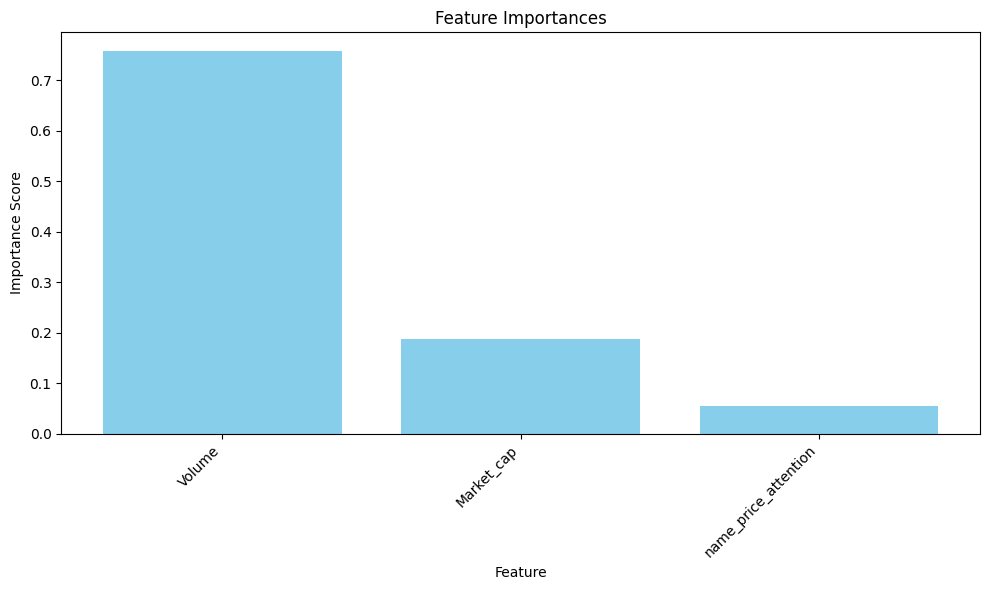

In [55]:
sorted_features = [x[0] for x in sorted_feature_importance]
sorted_importances = [x[1] for x in sorted_feature_importance]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances, color="skyblue", align="center")
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()